# Initializing weights in our model

#### Example based on the MNIST digit classifier from previous lessons

In [12]:
import numpy as np
import matplotlib.pyplot as plot

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_normal, glorot_uniform


#### Initialize the number of neurons

In [2]:
n_input = 784 #784 inputs for the 28x28 digit image

n_dense = 256 # a sufficiently-large dense hidden layer that recieves the inputs

#### Observations

- Large w/b values tend to correspond to large Z values, thus increasing the chances of saturation (z = w*x + b)
    - Large w/b => network has a strong BIAS (opinion) about how x is related to y
    - w/b near 0 => network has no biases at all
<br></br>
- Don't want both w/b to be 0, as then this would mean all neurons would treat inputs exactly the same (there is no variation)
    - Want to hit "goldilocks" zone: make w/b as small as possible while allowing the network to learn effectively from a broad spectrum of weights/biases to experiment with
    - <b>Note:</b> there are often much more weights than bias parameters in a network, so setting initial bias (b) to 0 should be ok
    

#### Initializing the weights and biases

The "goldilocks" zone: initialize all <b>biases (b)</b> to 0, but <u>randomly</u> sample weights from a <b>standard normal distribution</b>

In [5]:
bias_init = Zeros() # bias set to 0
weight_init = RandomNormal(stddev=1.0) #initial weights sampled from a standard normal distrbution (standard deviation = 1)

#### Creating the model (with normally distributed weights)

In [7]:
model = Sequential()

model.add(Dense(n_dense, input_dim = n_input, kernel_initializer=weight_init, bias_initializer=bias_init))
model.add(Activation('sigmoid'))


#### Generate random x values as inputs

In [8]:
x = np.random.random((1, n_input))

#### Forward propogation in the network

In [14]:
a = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [15]:
a #256 activation values for the 256 neurons in the sigmoid layer

array([[4.24875885e-01, 9.99999762e-01, 1.00000000e+00, 2.30039295e-04,
        9.99839425e-01, 1.12762966e-04, 3.37835871e-07, 4.00642477e-07,
        2.50941548e-06, 9.99989331e-01, 2.48863430e-14, 9.46663754e-12,
        6.82211612e-05, 8.50152612e-01, 1.00000000e+00, 9.99999583e-01,
        2.77913159e-06, 3.08808908e-02, 5.53412906e-14, 9.92704153e-01,
        8.63056183e-01, 9.72541749e-01, 1.00000000e+00, 9.12591183e-13,
        4.85709393e-07, 1.88682213e-01, 9.95883524e-01, 9.99998808e-01,
        9.96581733e-01, 9.92698908e-01, 1.54947475e-06, 1.60033494e-04,
        6.61444283e-05, 1.01172661e-10, 7.09090425e-11, 1.00000000e+00,
        1.26494953e-07, 9.25897912e-05, 1.60198059e-08, 1.00000000e+00,
        6.10589325e-07, 1.48311496e-01, 9.99999702e-01, 9.99999762e-01,
        9.99999881e-01, 9.99611974e-01, 1.08787902e-01, 9.43606973e-01,
        2.95941383e-01, 3.84733039e-06, 9.99999881e-01, 3.49264622e-01,
        1.78500588e-04, 2.53334315e-06, 4.46053627e-06, 8.988409

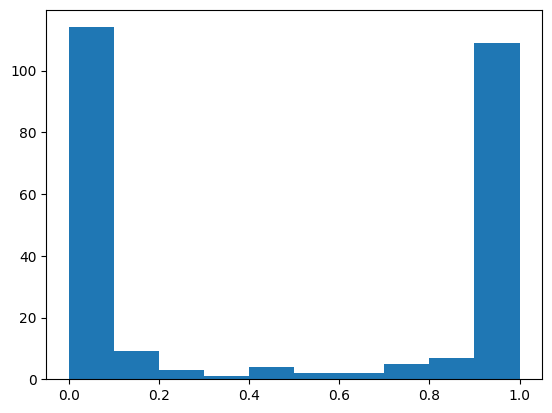

In [16]:
activation_plot = plot.hist(np.transpose(a))

#### Observations
- Majority of the activation values are stuck close to 0 or 1 (the extreme ends of the sigmoid function)
- The neurons have a lot of bias and are saturated
<br></br>

#### Solutions:
- Sample initial weights from a <b>Glorot normal</b> distribution rather than a normal distribution


#### Recompiling our model with Glorot normal distribution sampling:

In [19]:
weight_init = glorot_normal()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


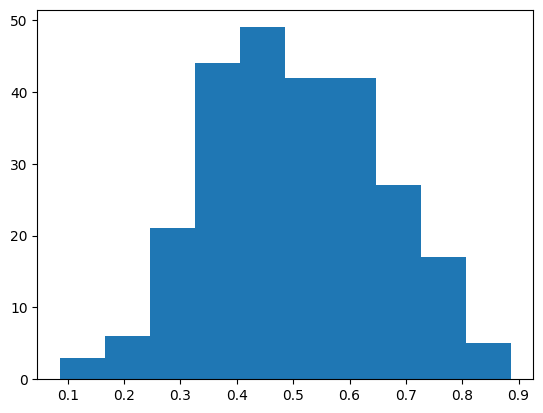

In [21]:
x = np.random.random((1, n_input))

model = Sequential()

model.add(Dense(n_dense, input_dim = n_input, kernel_initializer=weight_init, bias_initializer=bias_init))
model.add(Activation('sigmoid'))

a = model.predict(x)
activation_plot = plot.hist(np.transpose(a))

We now have activation values that are normally distrbuted instead of majority saturated at 0/1!
- Only a <b>handful</b> of neurons are saturated, most Z values lie in the middle of the distribution

### Alternative: sample from the <u>Glorot uniform distrbution</u> instead of the Glorot normal distribution

The results produced are very similiar and usually can choose whatever suits the model best

In [22]:
weight_init = glorot_uniform()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


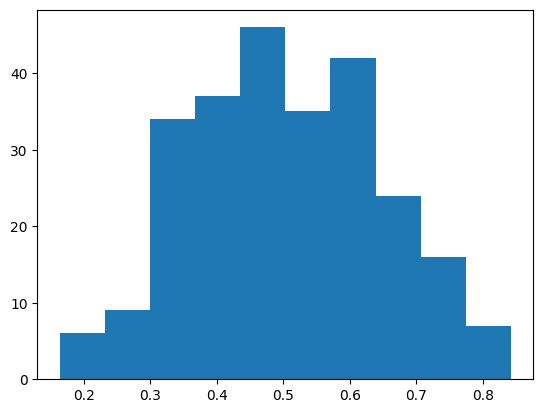

In [23]:
x = np.random.random((1, n_input))

model = Sequential()

model.add(Dense(n_dense, input_dim = n_input, kernel_initializer=weight_init, bias_initializer=bias_init))
model.add(Activation('sigmoid'))

a = model.predict(x)
activation_plot = plot.hist(np.transpose(a))

#### Results from using other activation functions: 
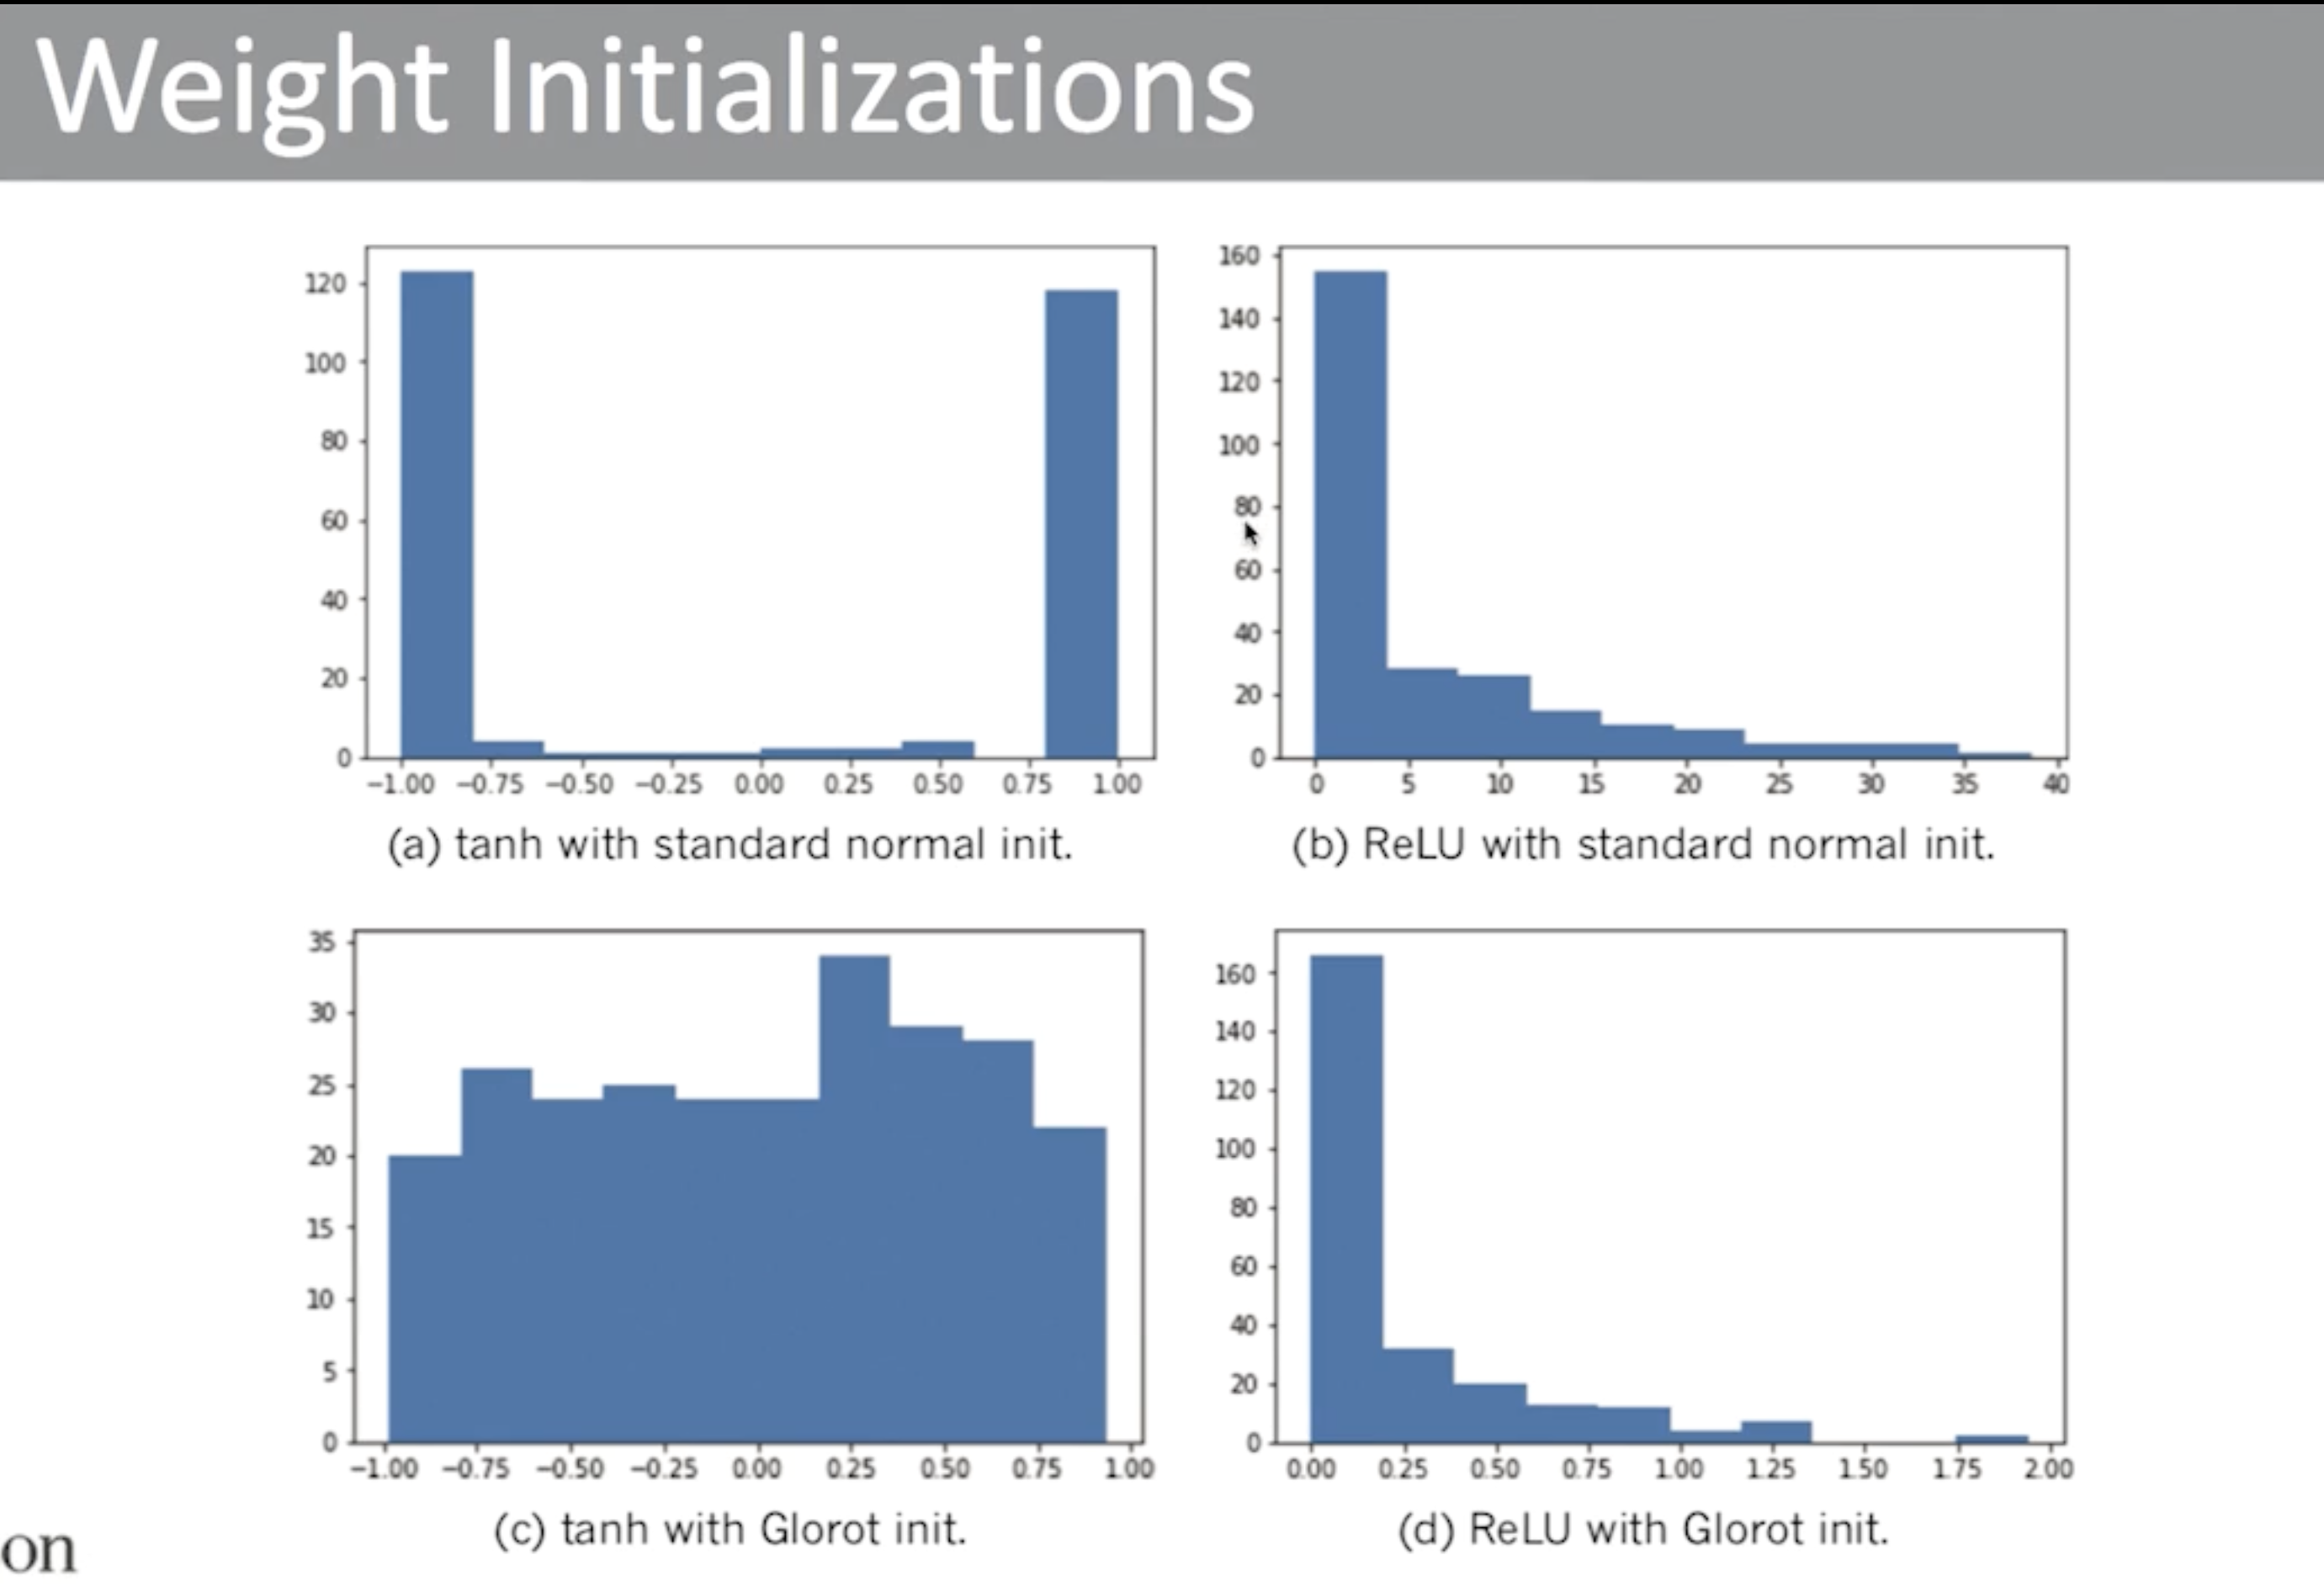


- Note that even though the ReLU shape with Glorot distribution looks almost identical, the Z values are much smaller (from ~40 to less than 2)

#### Other weight initialization distributions:

- He distribution
- LeCun distribution